In [32]:
#Arrays.ipynb

import numpy as np

# create rank 1 dim array
arr = np.array([1, 2, 3])
print(type(arr))
print(arr.dtype)
print(arr.shape)
print(arr[0], arr[1], arr[2])
arr[2] = 4
print(arr)

# create rank 2 array
arr2 = np.array([[1, 2, 3], [4, 5, 6]])
print(arr2.shape)
print(arr2[0, 0], arr2[0, 1], arr2[1, 0])
print(arr2[-1])

# create an array of zeros with 2 dim and size of 2 each
zero = np.zeros((2, 2))
print(zero)

# create an array of ones with 1 dim and size of 2 each
one = np.ones((1, 2))
print(one)

# create a new array with given shape, type, and filled with value
constant = np.full((2, 2), 5) # default type is float
print(constant)

# create a 2-D array with 1 on diagonal and 0 elsewhere
diag = np.eye(3) # number of rows
print(diag)

diag = np.eye(4, k=1) # diag starts at index 1
print(diag)

# Create an array with random values
rand = np.random.random((2, 2))
print(rand)

arr = np.arange(10) # generate array [0 1 2 3 4 5 6 7 8 9]
print(arr[0:8:2])   # every two number from 0 up to but not include 8

# create rank 2 with shape (3, 4) array
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(arr[:2, :2])

# Integer indexing

arr = np.array([[1, 2], [3, 4], [5, 6]])
print(arr[[0, 1, 2], [0, 1, 1]])

# arr[[0, 1, 2], [0, 1, 1]] is equivalent to [arr[0, 0], arr[1, 1], arr[2, 1]]

<class 'numpy.ndarray'>
int64
(3,)
1 2 3
[1 2 4]
(2, 3)
1 2 4
[4 5 6]
[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[5 5]
 [5 5]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
[[0.77270579 0.88246679]
 [0.91935463 0.8020024 ]]
[0 2 4 6]
[[1 2]
 [5 6]]
[1 4 6]


Data_transformation.ipynb

In [36]:
import numpy as np
import pandas as pd

trans = pd.DataFrame({
    "A": [12, 4, 5, None, 1],
    "B": [7, 2, 54, 3, None],
    "C": [20, 16, 11, 3, 8],
    "D": [14, 3, None, 2, 6]
}, index=['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5'])

trans

,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [37]:
result = trans.transform(lambda x: x + 10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [38]:
# 10 random numbers from 10-200
x = np.random.randint(10, 200, size=10)
x

array([ 61,  42, 159,  22, 166, 100, 165,  84,  29,  44])

In [39]:
np.digitize(x, bins=[50])

np.digitize(x, bins=[50, 100])

array([1, 0, 2, 0, 2, 2, 2, 1, 0, 0])

In [40]:
df = pd.DataFrame({"height": x})
df

,height
0,61
1,42
2,159
3,22
4,166
5,100
6,165
7,84
8,29
9,44


In [41]:
# create new column 'binned' with interval
df['binned'] = pd.cut(x=df['height'], bins=[0, 25, 50, 100, 200])
df

,height,binned
0,61,"(50, 100]"
1,42,"(25, 50]"
2,159,"(100, 200]"
3,22,"(0, 25]"
4,166,"(100, 200]"
5,100,"(50, 100]"
6,165,"(100, 200]"
7,84,"(50, 100]"
8,29,"(25, 50]"
9,44,"(25, 50]"


In [43]:
df['bin_label'] = pd.cut(x=df['height'],
                        bins=[0, 25, 50, 100, 200],
                        labels=[1, 2, 3, 4])
df

,height,binned,bin_label
0,61,"(50, 100]",3
1,42,"(25, 50]",2
2,159,"(100, 200]",4
3,22,"(0, 25]",1
4,166,"(100, 200]",4
5,100,"(50, 100]",3
6,165,"(100, 200]",4
7,84,"(50, 100]",3
8,29,"(25, 50]",2
9,44,"(25, 50]",2


In [45]:
pd.qcut(df['height'], q=5)

In [46]:
degrees = ["none", "cum laude", "magna cum laude", "summa cum laude"]
student_results = [3.93, 3.24, 2.80, 2.83, 3.91, 3.698, 3.731, 3.25, 3.24, 3.82, 3.22]
student_results.sort(reverse=True)
student_results_degrees = pd.cut(student_results, [0, 3.6, 3.8, 3.9, 4.0], labels=degrees)
honor = pd.DataFrame({'grades': student_results,
                      'honors': student_results_degrees})
honor

,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


<Axes: >

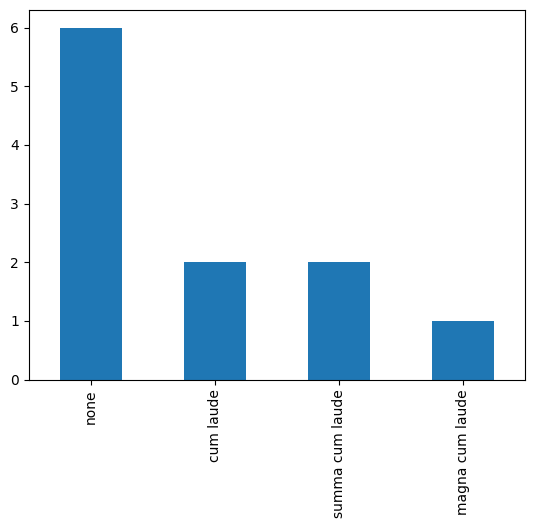

In [47]:
pd.Series(student_results_degrees).value_counts().plot.bar()

In [48]:
#datatypes.ipynb

import numpy as np

dt = np.array([1, 2])
print(dt.dtype)
# Output > "int64"

dt = np.array([1.0, 2.0])
print(dt.dtype)
# Output > "float64"

dt = np.array([1, 2], dtype=np.float64) # Force a particular datatype
print(dt)
print(dt.dtype)

student = np.dtype([('name', np.str_, 10), ('age', np.int64), ('marks', np.float64)])
print(student)

ms_student = np.array([('student1', 20, 100.0), ('student2withlongname', 22, 89.0)],
                      dtype=student)
print(ms_student)
print(ms_student.dtype)

int64
float64
[1. 2.]
float64
[('name', '<U10'), ('age', '<i8'), ('marks', '<f8')]
[('student1', 20, 100.) ('student2wi', 22,  89.)]
[('name', '<U10'), ('age', '<i8'), ('marks', '<f8')]


In [49]:
#pandas_object.ipynb

import pandas as pd

# create Series data structure
series = pd.Series([1, 3, 5, 6, 8])
series

data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2],
    'peaches': [2, 4, 6, 8]
}
fruits = pd.DataFrame(data) # create DataFrame with 3 columns
fruits

buyer = pd.DataFrame(data, index=['Tom', 'Isabelle', 'Daisy', 'Blathers'])
buyer

,apples,oranges,peaches
Tom,3,0,2
Isabelle,2,3,4
Daisy,0,7,6
Blathers,1,2,8


In [50]:
#reading_writing.ipynb

import pandas as pd

sales = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')
sales

sales.columns

data = pd.DataFrame(sales.loc[:50, ['ORDERNUMBER', 'CUSTOMERNAME', 'ADDRESSLINE1', 'POSTALCODE', 'STATUS']])
data.to_csv('new_sales.csv')